# Non-linear least squares fitting

In [1]:
%pylab nbagg

Populating the interactive namespace from numpy and matplotlib


In [2]:
x=linspace(0,5,50)

<IPython.core.display.Javascript object>


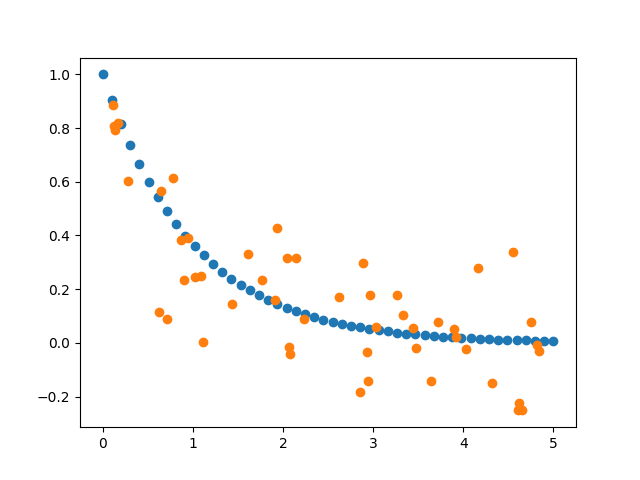

In [3]:
#create an arbitrary curve
ifig=5;close(ifig);figure(ifig)
def func_explore(x):
    return exp(-x)
#    return x
plot(x,func_explore(x),'o')

In [4]:
# create some noisy data
noise_level=0.2
noisy_x=x+noise_level*randn(len(x))
noisy_y=func_explore(x)+noise_level*randn(len(x))
plot(noisy_x,noisy_y,'o')

<IPython.core.display.Javascript object>


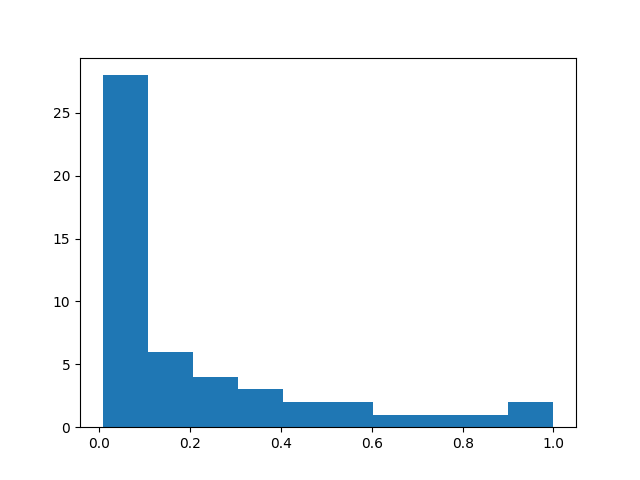

(array([ 28.,   6.,   4.,   3.,   2.,   2.,   1.,   1.,   1.,   2.]),
 array([ 0.00673795,  0.10606415,  0.20539036,  0.30471656,  0.40404277,
         0.50336897,  0.60269518,  0.70202138,  0.80134759,  0.90067379,  1.        ]),
 <a list of 10 Patch objects>)

In [5]:
## histogram of the arbitrary curve
ifig=6;close(ifig);figure(ifig)
hist(func_explore(x),10)

## now we want to curve fit the noisy data to a function f using Scipy

In [23]:
from scipy.optimize import curve_fit
#curve_fit?

#curve_fit will fit a non-linear curve to data, but we need to define the curve we THINK will fit and
# it will just return the optimal coefficients (array) as well as the covariance for each one

In [24]:
def model_func(x,a,b,c):
    return a*x**3+b*x**2+c
#    return a*exp(b*x)+c

#the plot below looks totally different depending on which return value you use. This is obvious, as the original
# function is an exponential one. So it makes sense that fitting a polynomial won't really work.
fitpars, covmat = curve_fit(model_func,noisy_x,noisy_y,p0=[1.5,-1.5,0.1])

In [34]:
variances = covmat.diagonal()
std_devs = np.sqrt(variances)
print(fitpars,std_devs)

[ 0.01611969 -0.09824802  0.49188067] [ 0.00478664  0.02267698  0.05479842]


<IPython.core.display.Javascript object>


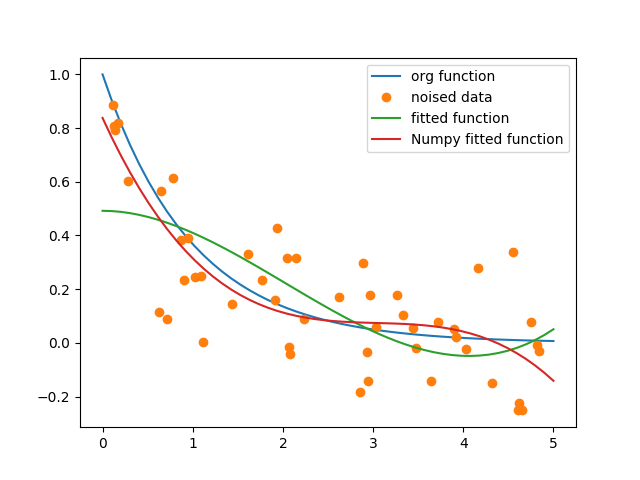

In [35]:
ifig=7;close(ifig);figure(ifig)


plot(x,func_explore(x),label='org function')    
plot(noisy_x,noisy_y,'o',label='noised data')   
plot(x,model_func(x,fitpars[0],fitpars[1],fitpars[2]),label='fitted function') # fitted model function
legend(loc=0)

## We can also curve fit using polyfit from numpy

In [36]:
import numpy as np

In [40]:
#polyfit only works to fit polynomials, whereas scipy.curve_fit uses YOUR function to find the best parameters.
coef = np.polyfit(noisy_x, noisy_y, 3)

In [38]:
def poly(x,a,b,c,d):
    return a*x**3 +b*x**2 +c*x +d

In [39]:
plot(x, poly(x, coef[0], coef[1], coef[2], coef[3]), label = "Numpy fitted function")
legend(loc=0)

# ----TIPS ON HOW TO PROBLEM SOLVE----


## General steps involved in a computational physics problem
From this example we can identify the following steps involved in solving a computational physics problem:

1. Identify clearly the question.
   - this may sound like a trivial step, but in practise a lot of confusion later on can be avoided if the question or problem to be addressed is very clearly defined
2. Identify the relevant and important physics that needs to be considered. 
    - if the problem does not have radiation or magnetic fields, then don't include them; again this sounds trivial but still ...
3. Formulate the physics in an appropriate mathematical framework.
4. Chose a suitable difference scheme to represent the mathematical equation.
    - this step determines the numerical accuracy of the scheme
    - it says how well do the difference equations represent the mathematical equations
5. Chose the right solution scheme for the difference equation.
    - this will effect the stability of the numerical solution
    - it will determine how precisely the adopted solution represents the difference equation

## Verification and validation
A very important final step that often takes significant amount of time and effort is to _check if we get the right answer for the right reasons_. We need to do answer to fundamental questions:

1. Have I solved the right equations? This test is called **validation**.
2. Have I solved the equations right? This is called **verification**.

An important verification test is a numerical convergence study as well as comparison against analytical solutions. The only real validation test is the comparison with experimental data.

